<a href="https://colab.research.google.com/github/ritzx21/Image-Classification_Fashion-MNIST-dataset/blob/main/Classifying_images_of_clothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

To log Error messages

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
import tensorflow_datasets as tfds
tfds.disable_progress_bar()

Importing the fashion MNIST Dataset

In [ ]:
dataset , metadata = tfds.load('fashion_mnist',as_supervised = True, with_info = True)

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


* Model will be trained using `train_dataset`
* Model will be tested against `test_dataset`

In [ ]:
train_dataset , test_dataset = dataset['train'], dataset['test']

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [ ]:
class_names = metadata.features['label'].names
print("Class names: {}".format(class_names))

Class names: ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


###Exploring the dataset


It has 60,000 training examples and 10,000 testing examples

In [ ]:
num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [ ]:
print("Numer of training examples : {}".format(num_train_examples))
print("Numer of testing examples : {}".format(num_test_examples))

Numer of training examples : 60000
Numer of testing examples : 10000


### Preprocess the data


The value of each pixel in an image is in the range [0,255]. So for the model to work porperly we need to normalize these values to range [0,1]

So here we create a normalization function and apply it to each image in the training dataset and the testing dataset.

In [ ]:
def normalize(images,labels):
  images = tf.cast(images , tf.float32)
  images /= 255
  return images,labels


#The map function applies the normalize function to each image in train_dataset and the test_dataset
train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)


#The first time we use the dataset, the images will be loaded from disk
#caching will keep them in memory, making it faster
train_dataset = train_dataset.cache()
test_dataset = test_dataset.cache()

### Explore the Preprocessed data

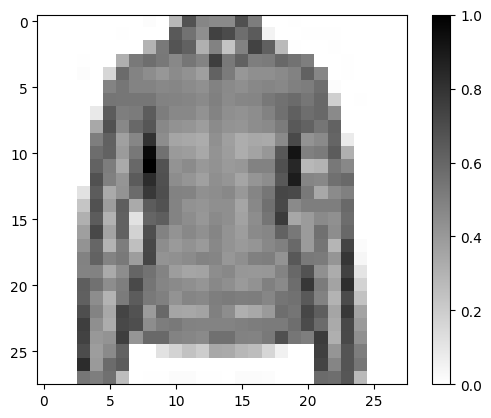

In [ ]:
# take an image , remove the color dimenssion by reshaping
for image, label in test_dataset.take(1):
  break
image = image.numpy().reshape((28,28))


#plot the image
plt.figure()
plt.imshow(image , cmap = plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

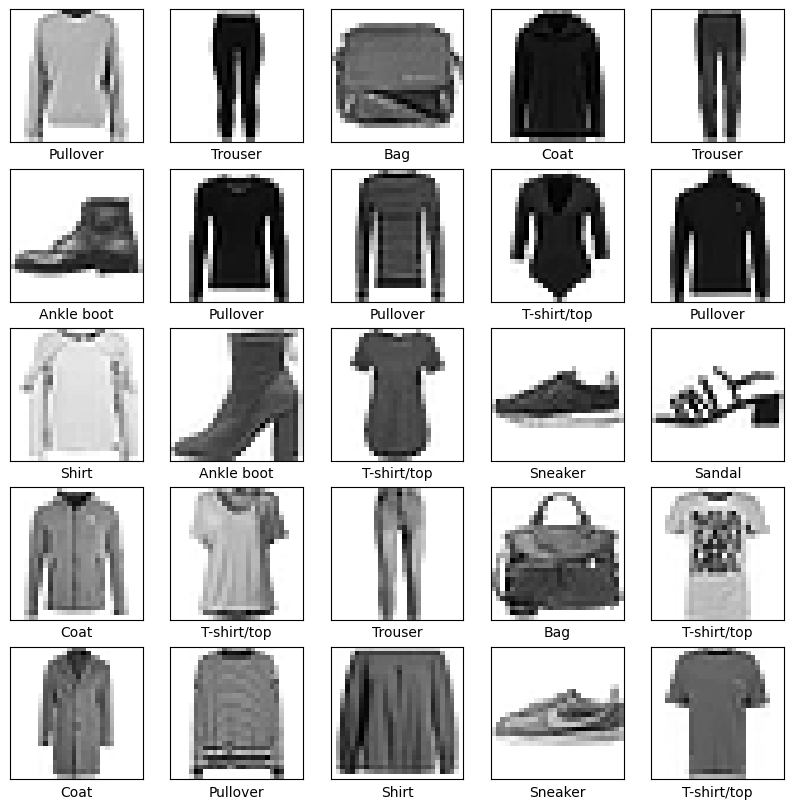

In [ ]:
plt.figure(figsize=(10,10))
for i,(image,label) in enumerate(train_dataset.take(25)):
    image = image.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
plt.show()

##Building the model


building the neural network requires configuring the layers of the model, then compiling the model.


First we set up the layers of the neural network.

In [ ]:
l0 = tf.keras.layers.Flatten(input_shape = (28,28,1))
l1 = tf.keras.layers.Dense(128, activation = tf.nn.relu)
l2 = tf.keras.layers.Dense(10, activation = tf.nn.softmax)

model = tf.keras.Sequential([l0,l1,l2])

So this neural network has 3 layers -

**input** `l0 = tf.keras.layers.Flatten` - this layer transforms the 2d-array of 28x28 pixel image into a 1d-array of 784 pixels(28*28)

This layer has no parameters , it's just to reformat the data. Think of this layer as unstacking the rows of pixels and lining them up

**hidden** `l1 = tf.keras.layer.Dense(128, activation = tf.nn.relu)` - A Densely connected network of 128 neurons. Since it is a Dense nn(neural network) i.e, a neuron is connected to all the neurons of the previous and the next layer (or simple, all neurons are connected to each other), Each neuron takes input from all 784 nodes from the previous layer.

Here the ReLU function is used as the activation function.

**output** `l2 = tf.keras.layers.Dense(10,activation = tf.nn.softmax)` - A 128-neuron, followed by 10 neuron softmax layer.

Each node represents a class of clothing

## Compile the model
specifying optimizers and loss functions

In [ ]:
model.compile(optimizer='adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(),metrics = ['accuracy'])

### Train the model

In [ ]:
batch_size = 32
train_dataset = train_dataset.cache().repeat().shuffle(num_train_examples).batch(batch_size)
test_dataset = test_dataset.cache().batch(batch_size)

In [ ]:
model.fit(train_dataset, epochs = 5 , steps_per_epoch = math.ceil(num_train_examples/batch_size))

Epoch 1/5
1875/1875 [==============================] - 18s 5ms/step - loss: 0.4968 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3777 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3379 - accuracy: 0.8773
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3120 - accuracy: 0.8841
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2875 - accuracy: 0.8931


As this model trains the loss and accuracy at every epoch is displayed.

The model reaches about (0.89) or 89% accuracy on the training data

### Evaluate accuracy

Next we need to compare how the model performs against the test dataset

In [ ]:
test_loss , test_accuracy = model.evaluate(test_dataset , steps = math.ceil(num_test_examples/batch_size))

print("Accuracy on test dataset : ",test_accuracy)

313/313 [==============================] - 2s 6ms/step - loss: 0.3626 - accuracy: 0.8718
Accuracy on test dataset :  0.8718000054359436


### Make predictions and explore


In [ ]:
for test_images,test_labels in test_dataset.take(1):
  test_images = test_images.numpy()
  test_labels = test_labels.numpy()
  prediction = model.predict(test_images)

1/1 [==============================] - 0s 100ms/step


In [ ]:
prediction.shape

(32, 10)

In [ ]:
prediction[0]  #Prediction of the first image

array([7.3342126e-05, 1.1884886e-06, 6.7630727e-03, 9.5673772e-07,
       9.8180443e-01, 1.0147345e-10, 1.1340671e-02, 3.7050501e-08,
       1.5952062e-05, 1.9853020e-07], dtype=float32)

The prediction is an array of 10 numbers. These describe the 'confidence' of the model that the image correspondes to each of the 10 different articles of clothing.

We can see which label has the highest confidence value:

In [ ]:
np.argmax(prediction[0])

4

In [ ]:
test_labels[0]

4

In [ ]:
np.argmax(prediction[6])

0

In [ ]:
test_labels[6]

0

Graph to look at full 10 set of class predictions

In [ ]:
def plot_image(i, prediction_array , true_labels , images):
  prediction_array , true_label , img = prediction_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap = plt.cm.binary)

  predicted_label = np.argmax(prediction_array)

  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(prediction_array),
                                       class_names[true_label]),
                                       color = color)

def plot_value_array(i, prediction_array, true_label):
  prediction_array, true_label = prediction_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), prediction_array,color ="#999999")
  plt.ylim([0,1])
  predicted_label = np.argmax(prediction_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

0th image , prediction and prediction array

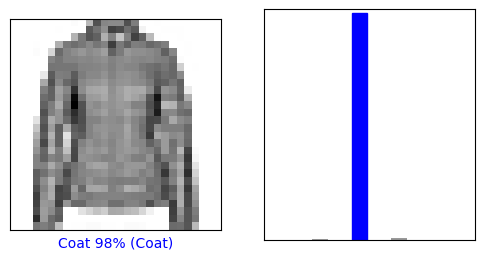

In [ ]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i ,  prediction , test_labels , test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction , test_labels)

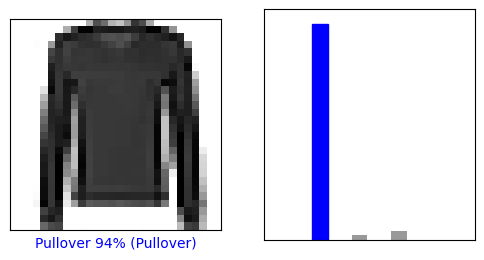

In [ ]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i , prediction ,test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i , prediction , test_labels)

Plotting several images with their predictions. Correst prediction labels are blue and incorrect prediction labels are red.

The number gives the percent for the predicted label. It can be wrong evwn when very confident.

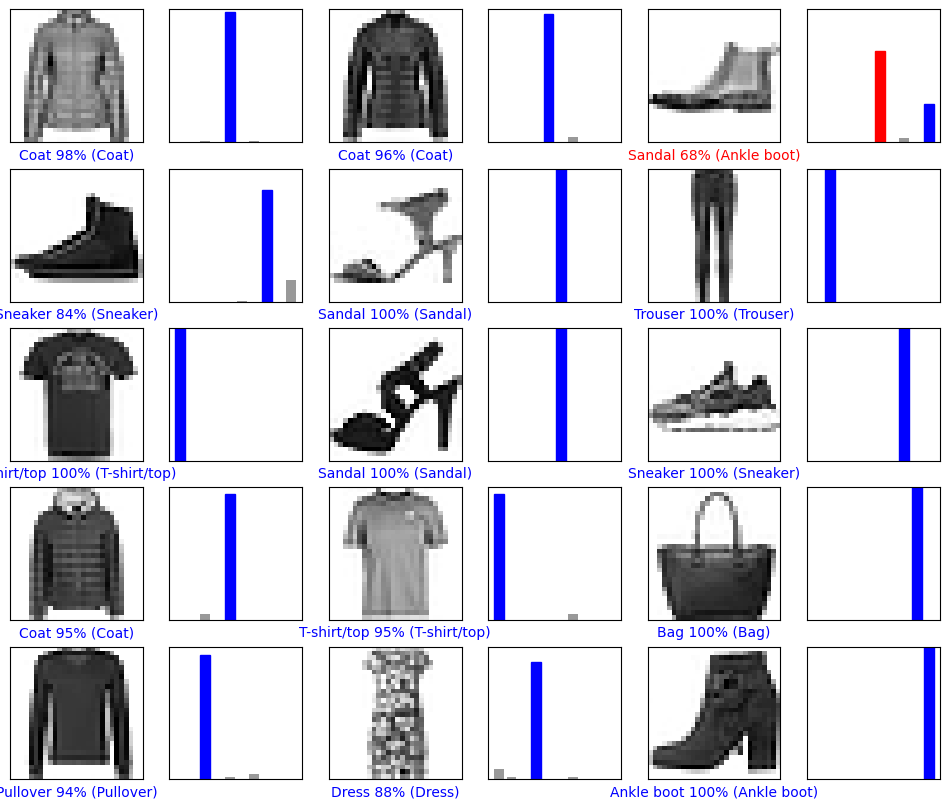

In [50]:
# Plot the first X test images, their predicted label , and the true label
# Color of correct prediction is blue , incorrect predictiond are in red.

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols , 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols , 2*i+1)
  plot_image(i , prediction , test_labels , test_images)
  plt.subplot(num_rows, 2*num_cols , 2*i+2)
  plot_value_array(i , prediction , test_labels)

Use trained model to make a prediction about a single image

In [51]:
#Grab an image from the test dataset

img = test_images[0]
print(img.shape)

(28, 28, 1)


tf.keras models are optimized to make predictions on a batch , or collection, of examples at once.

So even though we're using a single image , we need to add it to a list:

In [52]:
#Add the image to a batch where it's the only member
img = np.array([img])
print(img.shape)

(1, 28, 28, 1)


Now predict the image

In [53]:
prediction_single = model.predict(img)

print(prediction_single)

1/1 [==============================] - 0s 66ms/step
[[7.3341995e-05 1.1884877e-06 6.7630671e-03 9.5673511e-07 9.8180455e-01
  1.0147327e-10 1.1340652e-02 3.7050366e-08 1.5952035e-05 1.9852948e-07]]


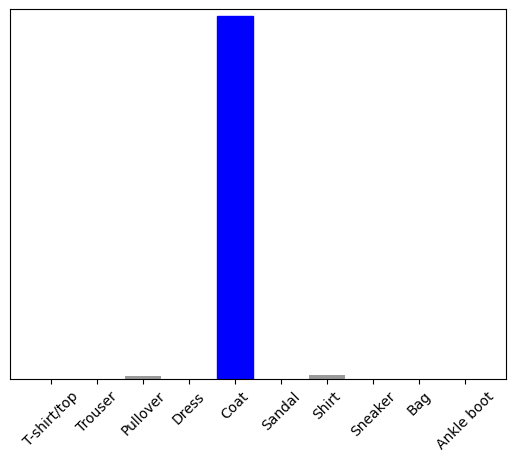

In [57]:
plot_value_array(0,prediction_single, test_labels)
show = plt.xticks(range(10), class_names,rotation = 45)

model.predict returns a list of lists for each image in the batch data.

Grab predictions for the only image in the batch.

In [58]:
np.argmax(prediction_single[0])

4